Best parameters found:  {'rf__n_estimators': 100, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_depth': 20}
Test MSE: 8.77717402120284e-07
Test RMSE: 0.000936865733240513
Test R^2: 0.9975042700249556
Accuracy (%): 99.75042700249556


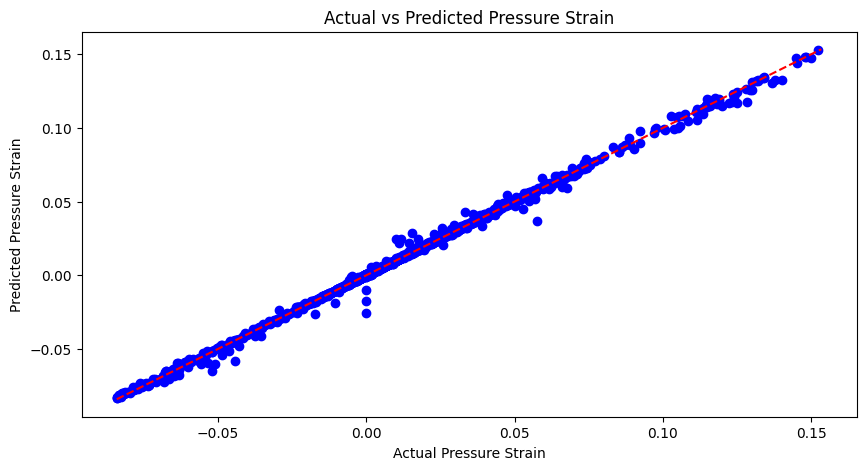

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain'])
X = df[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
        'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline setup without Polynomial Features for quicker execution
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning setup
param_grid = {
    'rf__n_estimators': [100],  # Reduced number for speed
    'rf__max_depth': [10, 20],  # Fewer options
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Randomized Search with fewer iterations and less cross-validation
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=5, cv=3, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model found from the RandomizedSearch
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Percentage accuracy from R^2 score
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R^2:", r2)
print("Accuracy (%):", accuracy)

# Visualization of predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Actual vs Predicted Pressure Strain')
plt.savefig('prediction_accuracy_plot.png')  # Save the plot as a PNG file
plt.show()

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Actual Pressure Strain': y_test,
    'Predicted Pressure Strain': y_pred
})
results_df.to_csv('model_results.csv', index=False)


Best parameters found:  {'rf__n_estimators': 100, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_depth': 20}
Test MSE: 8.77717402120284e-07
Test RMSE: 0.000936865733240513
Test R^2: 0.9975042700249556
Accuracy (%): 99.75042700249556


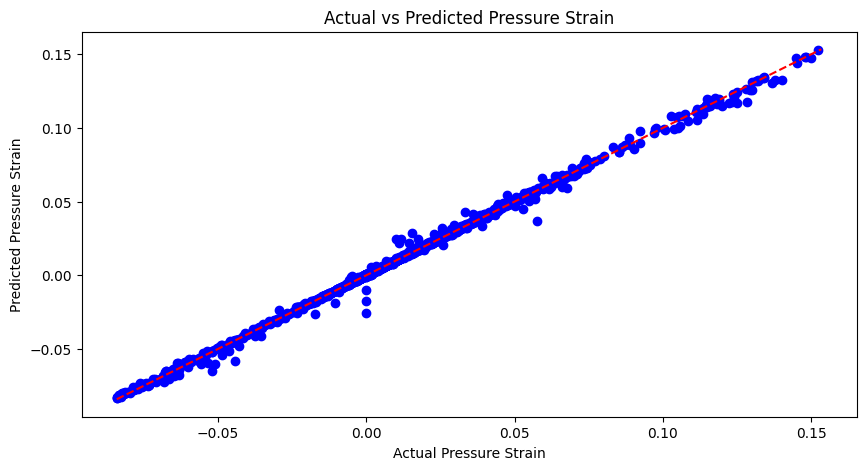

['final_model.joblib']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain'])
X = df[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
        'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline setup without Polynomial Features for quicker execution
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning setup
param_grid = {
    'rf__n_estimators': [100],  # Reduced number for speed
    'rf__max_depth': [10, 20],  # Fewer options
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Randomized Search with fewer iterations and less cross-validation
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=5, cv=3, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

# Evaluate the best model found from the RandomizedSearch
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Percentage accuracy from R^2 score
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R^2:", r2)
print("Accuracy (%):", accuracy)

# Visualization of predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Actual vs Predicted Pressure Strain')
plt.savefig('prediction_accuracy_plot.png')  # Save the plot as a PNG file
plt.show()

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Actual Pressure Strain': y_test,
    'Predicted Pressure Strain': y_pred
})
results_df.to_csv('model_results.csv', index=False)

# Save the model
joblib.dump(best_model, 'final_model.joblib')


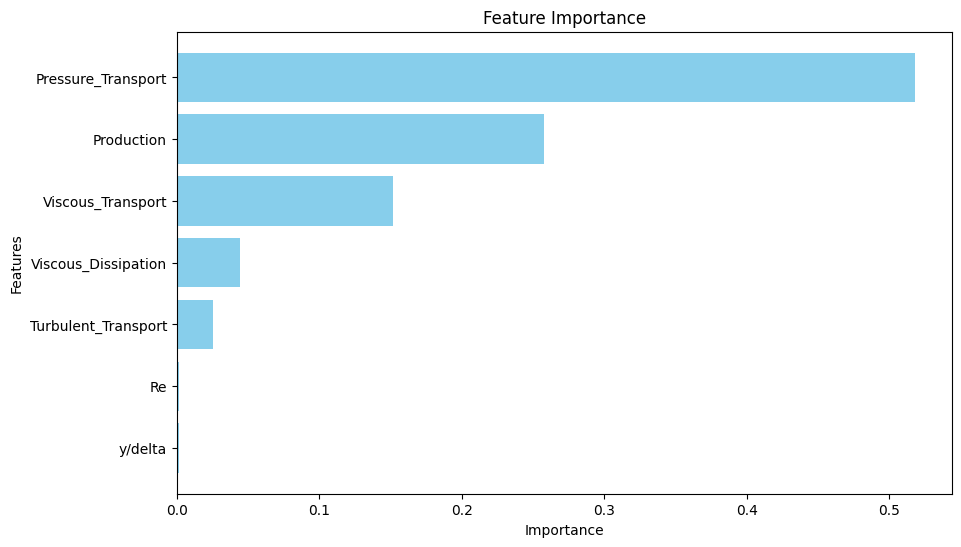

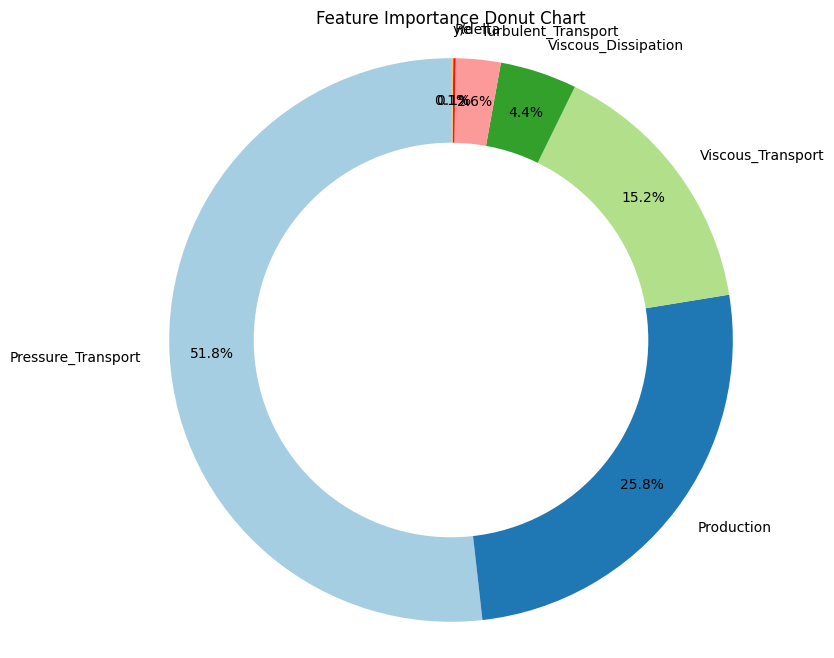

In [3]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import numpy as np

# Load the model
model = joblib.load('final_model.joblib')

# Assuming 'X' is loaded or available from previous code, and it contains the correct feature names
feature_names = ['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
                 'Pressure_Transport', 'Viscous_Dissipation', 'Re']

# Get feature importances from the model (assuming the model is a fitted RandomForest)
importances = model.named_steps['rf'].feature_importances_

# Create a DataFrame for better visualization and manipulation
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

# Plotting a donut graph of feature importances
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(features_df['Importance'], labels=features_df['Feature'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.Paired(np.arange(len(importances))))

# Draw a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Feature Importance Donut Chart')
plt.show()


Test MSE: 8.77717402120284e-07
Test RMSE: 0.000936865733240513
Test R^2: 0.9975042700249556
Accuracy (%): 99.75042700249556


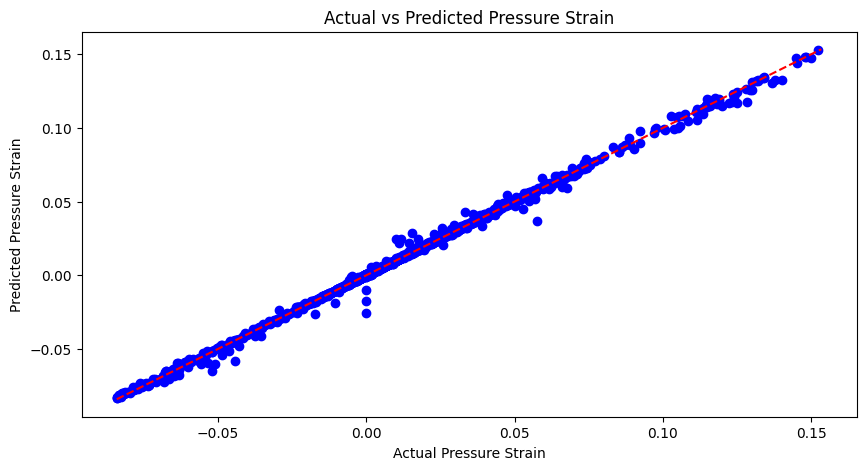

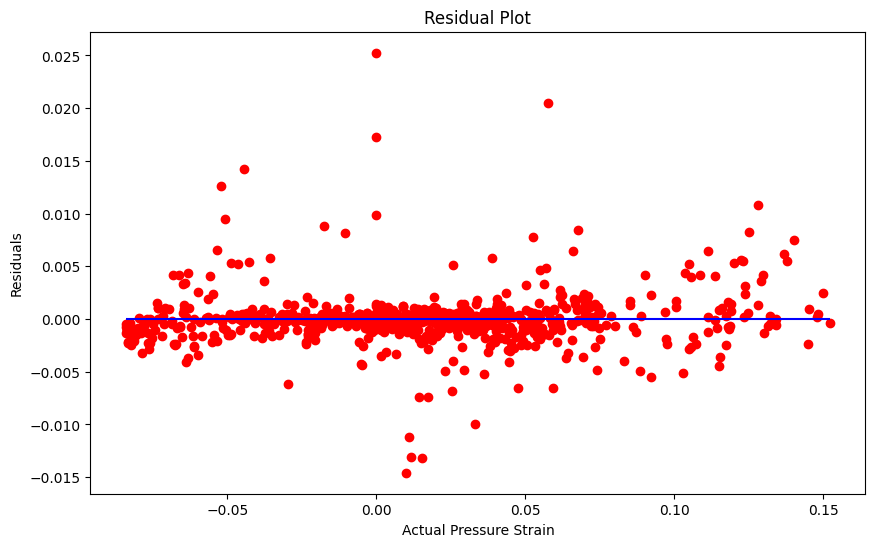

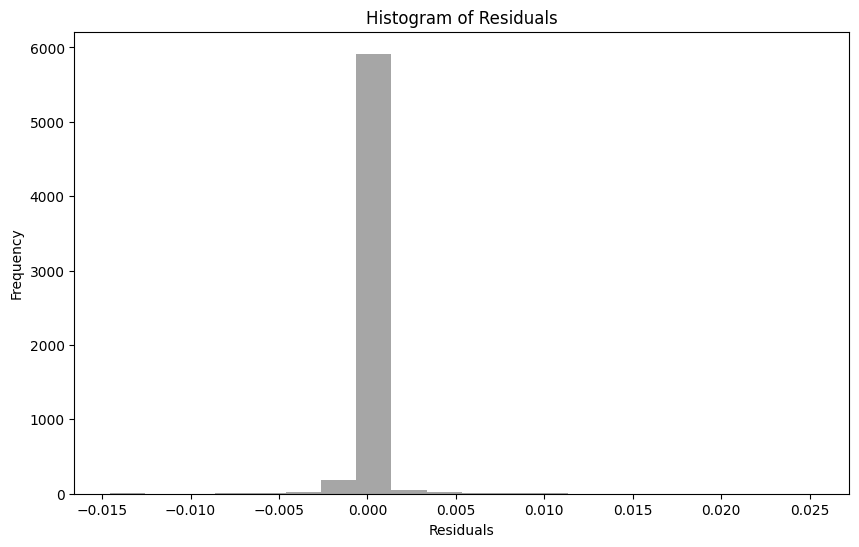

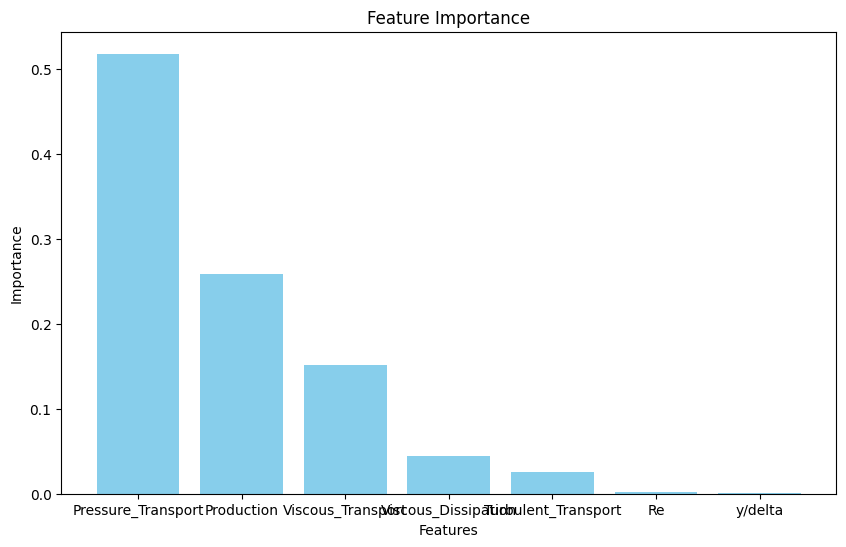

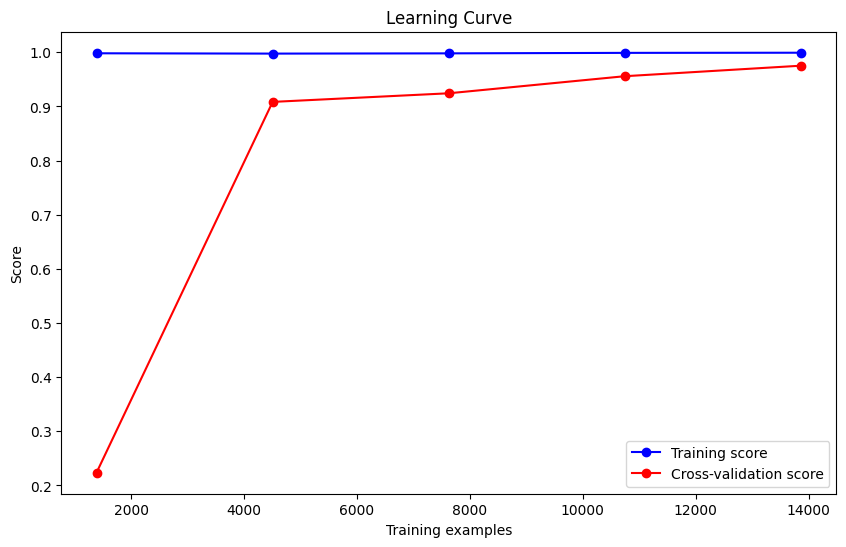

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Load the model
model = joblib.load('final_model.joblib')

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain'])
X = df[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
        'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data for evaluation and analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make predictions using the loaded model
y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Percentage accuracy from R^2 score
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R^2:", r2)
print("Accuracy (%):", accuracy)

# Visualization of predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Actual vs Predicted Pressure Strain')
plt.savefig('prediction_accuracy_plot.png')  # Save the plot as a PNG file
plt.show()

# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='blue')
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='grey', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Feature Importance Analysis
feature_names = X.columns.tolist()
importances = model.named_steps['rf'].feature_importances_
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, n_jobs=-1, cv=3, train_sizes=np.linspace(.1, 1.0, 5))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


Data contains NaN values. Handling them...
Accuracy (%): 99.00%


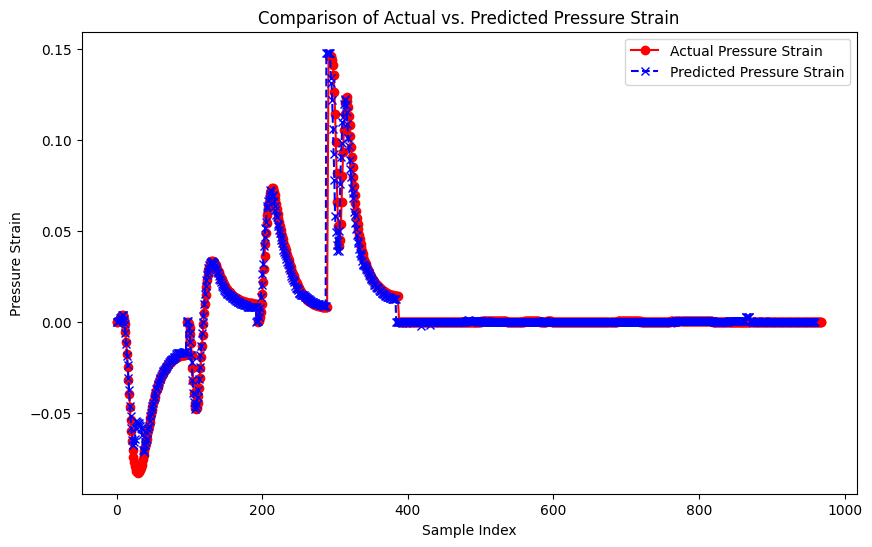

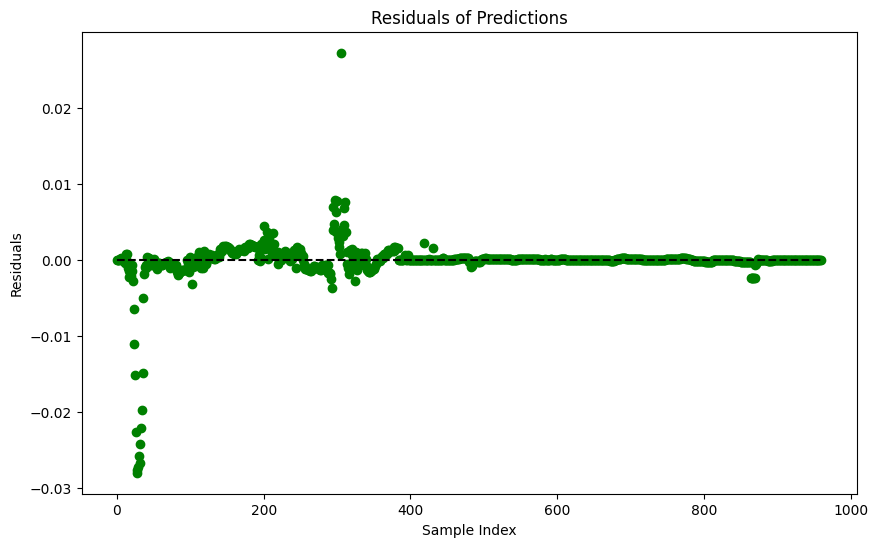

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import r2_score

# Load the model
model = joblib.load('final_model.joblib')

# Load the new Excel data
file_path = 'testing.xlsx'  # Ensure this path is correct
new_data = pd.read_excel(file_path)

# Assuming columns to drop are named 'FileType' and 'Dataset'
# Check if these columns are present and drop them
if 'FileType' in new_data.columns:
    new_data.drop('FileType', axis=1, inplace=True)
if 'Dataset' in new_data.columns:
    new_data.drop('Dataset', axis=1, inplace=True)

# Check for NaN values and handle them
if new_data.isnull().any().any():
    print("Data contains NaN values. Handling them...")
    # Drop rows where target is NaN, assuming 'Pressure_Strain' is the target
    new_data.dropna(subset=['Pressure_Strain'], inplace=True)
    # Fill NaNs in features with the mean (or choose another method)
    new_data.fillna(new_data.mean(), inplace=True)

# Assuming the dataset includes a target column named 'Pressure_Strain'
X_new = new_data[['y/delta', 'Production', 'Turbulent_Transport', 'Viscous_Transport',
                  'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y_actual = new_data['Pressure_Strain']

# Predict using the loaded model
y_pred = model.predict(X_new)

# Calculate R^2 Score (Coefficient of Determination) for accuracy
r2 = r2_score(y_actual, y_pred)
accuracy_percent = r2 * 100
print(f"Accuracy (%): {accuracy_percent:.2f}%")

# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual Pressure Strain', color='red', marker='o')
plt.plot(y_pred, label='Predicted Pressure Strain', color='blue', linestyle='--', marker='x')
plt.title('Comparison of Actual vs. Predicted Pressure Strain')
plt.xlabel('Sample Index')
plt.ylabel('Pressure Strain')
plt.legend()
plt.show()

# Residual Plot
residuals = y_actual - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='green')
plt.hlines(y=0, xmin=0, xmax=len(residuals), colors='black', linestyles='--')
plt.title('Residuals of Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.show()


RandomForest - Test MSE: 8.567159439607368e-07, R^2: 0.9975639862485621
XGBoost - Test MSE: 8.191983627661161e-07, R^2: 0.9976706649491922
CatBoost - Test MSE: 4.185945588700754e-06, R^2: 0.9880975472807205


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AdaBoost - Test MSE: 4.192346347344818e-05, R^2: 0.8807934715711303


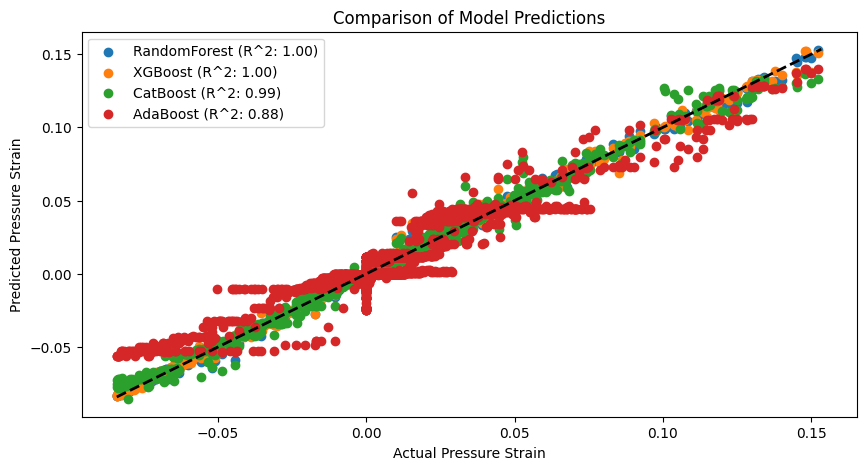

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import joblib  # For saving models


# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain'])
X = df[['y/delta', 'y^+','Production', 'Turbulent_Transport', 'Viscous_Transport', 'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline setup without Polynomial Features for quicker execution
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))  # Placeholder that will be replaced
])

# Define models and hyperparameters in a dictionary
models = {
    'RandomForest': (RandomForestRegressor(random_state=42), {
        'model__n_estimators': [100],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }),
    'XGBoost': (XGBRegressor(objective='reg:squarederror', random_state=42), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10],
        'model__learning_rate': [0.1, 0.01],
        'model__subsample': [0.7, 0.9]
    }),
    'CatBoost': (CatBoostRegressor(random_state=42, verbose=0), {
        'model__iterations': [100, 200],
        'model__depth': [4, 6],
        'model__learning_rate': [0.1, 0.01]
    }),
    'AdaBoost': (AdaBoostRegressor(random_state=42), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.5]
    })
}

results = []

# Loop through models
for name, (model, params) in models.items():
    pipeline.set_params(model=model)
    search = RandomizedSearchCV(pipeline, params, n_iter=5, cv=3, scoring='r2', random_state=42)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test MSE: {mse}, R^2: {r2}")
    results.append((name, best_model, mse, r2))
    # Save model
    joblib.dump(best_model, f'{name}_model.pkl')

# Plot results
plt.figure(figsize=(10, 5))
for name, model, mse, r2 in results:
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=f'{name} (R^2: {r2:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()



c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RandomForest - Test MSE: 6.462819048145303e-06, R^2: 0.9922127183170911
XGBoost - Test MSE: 1.6420372007732593e-06, R^2: 0.9980214506825924
CatBoost - Test MSE: 6.203963764936165e-06, R^2: 0.9925246223005451


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AdaBoost - Test MSE: 7.356357549494887e-05, R^2: 0.9113606183751188


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


DNN - Test MSE: 5.864283309590331e-06, R^2: 0.9929339154229815
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


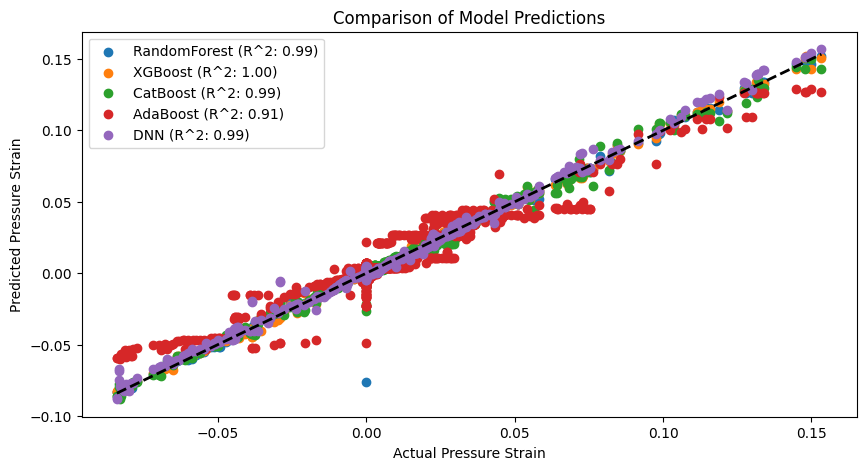

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib  # For saving models

# Custom DNN Regressor Class
class KerasDNNRegressor(BaseEstimator, TransformerMixin):
    def __init__(self, layers=[64, 64], dropout=0.1, activation='relu', optimizer='adam', epochs=50, batch_size=32):
        self.layers = layers
        self.dropout = dropout
        self.activation = activation
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self._build_model()
    
    def _build_model(self):
        model = Sequential()
        model.add(Dense(self.layers[0], input_dim=X_train.shape[1], activation=self.activation))
        for layer_size in self.layers[1:]:
            model.add(Dense(layer_size, activation=self.activation))
            model.add(Dropout(self.dropout))
        model.add(Dense(1, activation='linear'))  # Output layer
        model.compile(loss='mean_squared_error', optimizer=self.optimizer)
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def save_model(self, filename):
        self.model.save(filename)

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'
df = pd.read_excel(file_path).dropna(subset=['Pressure_Strain','FileType','Lx'])
X = df[['y/delta', 'y^+','Production', 'Turbulent_Transport', 'Viscous_Transport', 'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline setup without Polynomial Features for quicker execution
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))  # Placeholder that will be replaced
])

# Define models and hyperparameters in a dictionary
models = {
    'RandomForest': (RandomForestRegressor(random_state=42), {
        'model__n_estimators': [100],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }),
    'XGBoost': (XGBRegressor(objective='reg:squarederror', random_state=42), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10],
        'model__learning_rate': [0.1, 0.01],
        'model__subsample': [0.7, 0.9]
    }),
    'CatBoost': (CatBoostRegressor(random_state=42, verbose=0), {
        'model__iterations': [100, 200],
        'model__depth': [4, 6],
        'model__learning_rate': [0.1, 0.01]
    }),
    'AdaBoost': (AdaBoostRegressor(random_state=42), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.5]
    }),
    'DNN': (KerasDNNRegressor(), {
        'model__layers': [(100, 50), (200, 100)],
        'model__dropout': [0.1, 0.2],
        'model__activation': ['relu'],
        'model__optimizer': ['adam', 'sgd'],
        'model__epochs': [50, 100],
        'model__batch_size': [32, 64]
    })
}

results = []

# Loop through models
for name, (model, params) in models.items():
    pipeline.set_params(model=model)
    search = RandomizedSearchCV(pipeline, params, n_iter=5, cv=3, scoring='r2', random_state=42)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test MSE: {mse}, R^2: {r2}")
    results.append((name, best_model, mse, r2))
    # Save model
    if name == 'DNN':
        best_model.named_steps['model'].save_model(f'{name}_model.h5')
    else:
        joblib.dump(best_model, f'{name}_model.pkl')

# Plot results
plt.figure(figsize=(10, 5))
for name, model, mse, r2 in results:
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=f'{name} (R^2: {r2:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Pressure Strain')
plt.ylabel('Predicted Pressure Strain')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()


RandomForest - Test MSE: 0.0019107947037685642, R^2: -1.2920485212628128, Accuracy: -129.20485212628128%
XGBoost - Test MSE: 0.0016897919525446189, R^2: -1.0269499064619576, Accuracy: -102.69499064619576%
CatBoost - Test MSE: 0.001127963440797875, R^2: -0.35302182459493636, Accuracy: -35.302182459493636%
AdaBoost - Test MSE: 0.0014523343979286518, R^2: -0.7421133220571619, Accuracy: -74.21133220571619%
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


DNN - Test MSE: 0.0001231869220182128, R^2: 0.8522340459213663, Accuracy: 85.22340459213663%


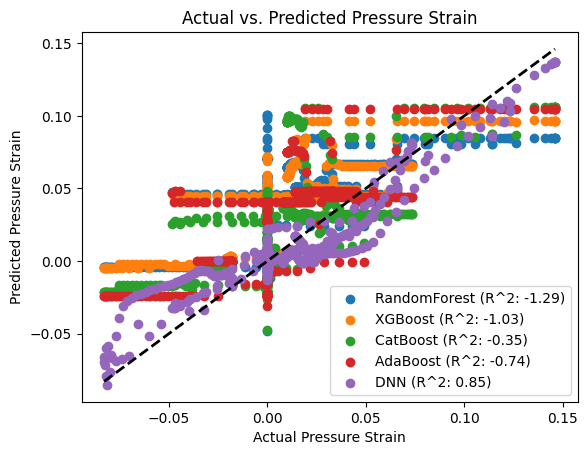

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For loading models
import tensorflow as tf

# Load the saved models
models = {
    'RandomForest': joblib.load('RandomForest_model.pkl'),
    'XGBoost': joblib.load('XGBoost_model.pkl'),
    'CatBoost': joblib.load('CatBoost_model.pkl'),
    'AdaBoost': joblib.load('AdaBoost_model.pkl'),
    'DNN': tf.keras.models.load_model('DNN_model.h5')
}

# Load and prepare testing data
file_path = 'testing.xlsx'  # Ensure the correct file path
df_test = pd.read_excel(file_path)
df_test = df_test.dropna()  # Drop rows with NaN values

X_test = df_test[['y/delta', 'y^+', 'Production', 'Turbulent_Transport', 'Viscous_Transport', 'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y_test = df_test['Pressure_Strain']

# Ensure consistent feature names during scaling
scaler = StandardScaler()
scaler.fit(X_test)  # Fit scaler to test data
X_test_scaled = scaler.transform(X_test)  # Scale data

# Prepare a DataFrame to collect all predictions
results_df = pd.DataFrame()
results_df['Actual Pressure Strain'] = y_test

fig, ax = plt.subplots()

# Predict and evaluate each model
for name, model in models.items():
    if name == 'DNN':
        y_pred = model.predict(X_test_scaled).flatten()  # DNN expects scaled data
    else:
        y_pred = model.predict(X_test_scaled)  # Other models also expect scaled data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Percent accuracy based on R^2 score
    print(f"{name} - Test MSE: {mse}, R^2: {r2}, Accuracy: {accuracy}%")
    results_df[f'{name} Predicted'] = y_pred
    
    # Plot actual vs predicted
    ax.scatter(y_test, y_pred, label=f'{name} (R^2: {r2:.2f})')

# Finalize the plot
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Actual Pressure Strain')
ax.set_ylabel('Predicted Pressure Strain')
ax.set_title('Actual vs. Predicted Pressure Strain')
ax.legend()

plt.show()

# Save the results to an Excel file
results_df.to_excel('result.xlsx', index=False)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import joblib  # For saving models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load Excel data
file_path = 'combined_data_all_reynolds_20PI_100PI.xlsx'  # Change this to your actual data file
df = pd.read_excel(file_path).dropna()
X = df[['y/delta', 'y^+', 'Production', 'Turbulent_Transport', 'Viscous_Transport', 'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y = df['Pressure_Strain']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Keras DNN model
def create_dnn_model(input_shape, layers=[64, 64], dropout=0.1, optimizer='adam'):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=input_shape, activation='relu'))
    for layer_size in layers[1:]:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

dnn_model = create_dnn_model(X_train.shape[1])

# Define a training pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))  # This is a placeholder
])

# Define models and hyperparameters in a dictionary
models = {
    'RandomForest': (RandomForestRegressor(random_state=42), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }),
    'XGBoost': (XGBRegressor(objective='reg:squarederror', random_state=42), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10],
        'model__learning_rate': [0.1, 0.01],
        'model__subsample': [0.7, 0.9]
    }),
    'CatBoost': (CatBoostRegressor(random_state=42, verbose=0), {
        'model__iterations': [100, 200],
        'model__depth': [4, 6],
        'model__learning_rate': [0.1, 0.01]
    }),
    'AdaBoost': (AdaBoostRegressor(random_state=42), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.5]
    })
}

# Train and evaluate each model
results = []
for name, (model, params) in models.items():
    pipeline.set_params(model=model)
    search = GridSearchCV(pipeline, params, cv=5, scoring='r2')
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test MSE: {mse}, R^2: {r2}")
    results.append((name, best_model, mse, r2))
    # Save model
    joblib.dump(best_model, f'{name}_model.pkl')

# Train and save the DNN separately
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
dnn_model.save('DNN_model.h5')

# Plotting results omitted for brevity


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RandomForest - Test MSE: 6.277150818205416e-06, R^2: 0.9924364366040086
XGBoost - Test MSE: 1.4233902986143074e-06, R^2: 0.9982849061504808
CatBoost - Test MSE: 3.5749551880373234e-06, R^2: 0.9956924087080834
AdaBoost - Test MSE: 7.356357549494887e-05, R^2: 0.9113606183751188


RandomForest - Test MSE: 0.0018302220008722255, R^2: -1.195399444225142, Accuracy: -119.53994442251421%
XGBoost - Test MSE: 0.001777705103634083, R^2: -1.1324040442386374, Accuracy: -113.24040442386374%
CatBoost - Test MSE: 0.0007241856319673349, R^2: 0.1313202807204613, Accuracy: 13.13202807204613%
AdaBoost - Test MSE: 0.0014523343979286518, R^2: -0.7421133220571619, Accuracy: -74.21133220571619%
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ayush\OneDrive\Desktop\code\MTP\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


DNN - Test MSE: 0.024342709378920503, R^2: -28.19972037050559, Accuracy: -2819.9720370505593%


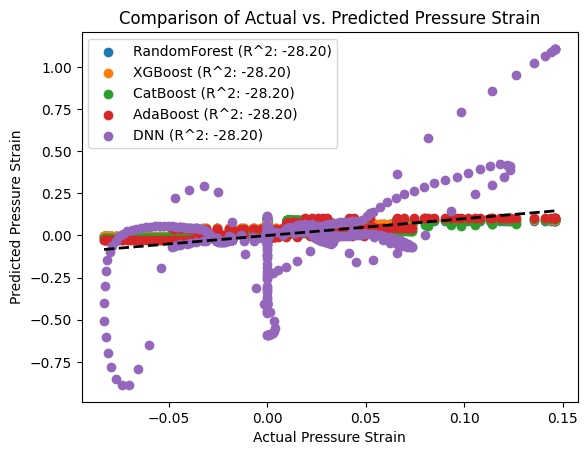

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For loading models
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved models
models = {
    'RandomForest': joblib.load('RandomForest_model.pkl'),
    'XGBoost': joblib.load('XGBoost_model.pkl'),
    'CatBoost': joblib.load('CatBoost_model.pkl'),
    'AdaBoost': joblib.load('AdaBoost_model.pkl'),
    'DNN': tf.keras.models.load_model('DNN_model.h5')
}

# Load and prepare testing data
file_path = 'testing.xlsx'  # Ensure the correct file path
df_test = pd.read_excel(file_path)
df_test = df_test.dropna()  # Drop rows with NaN values to ensure clean data

X_test = df_test[['y/delta', 'y^+', 'Production', 'Turbulent_Transport', 'Viscous_Transport', 'Pressure_Transport', 'Viscous_Dissipation', 'Re']]
y_test = df_test['Pressure_Strain']

# Scale features consistently
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# DataFrame to collect all predictions
results_df = pd.DataFrame()
results_df['Actual Pressure Strain'] = y_test

# Predict and evaluate each model
for name, model in models.items():
    if name == 'DNN':
        y_pred = model.predict(X_test_scaled).flatten()  # DNN expects scaled data
    else:
        y_pred = model.predict(X_test_scaled)  # Other models also expect scaled data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Percent accuracy based on R^2 score
    print(f"{name} - Test MSE: {mse}, R^2: {r2}, Accuracy: {accuracy}%")
    results_df[f'{name} Predicted'] = y_pred

# Save the results to an Excel file
results_df.to_excel('result.xlsx', index=False)

# Plotting results
fig, ax = plt.subplots()
for name in models.keys():
    ax.scatter(y_test, results_df[f'{name} Predicted'], label=f'{name} (R^2: {r2:.2f})')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Actual Pressure Strain')
ax.set_ylabel('Predicted Pressure Strain')
ax.set_title('Comparison of Actual vs. Predicted Pressure Strain')
ax.legend()
plt.show()
